In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [75]:
data =pd.read_csv('kyphosis.csv')

In [76]:
data

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [77]:
data['Kyphosis']=np.where(data['Kyphosis']=='absent',0,1)

In [78]:
data

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null int32
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int32(1), int64(3)
memory usage: 2.3 KB


In [80]:
data['Number'].value_counts()

3     23
4     18
5     17
2     12
7      5
6      4
10     1
9      1
Name: Number, dtype: int64

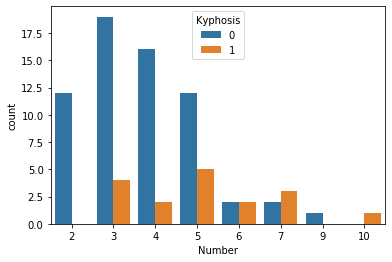

In [81]:
sns.countplot(x='Number',data=data,hue='Kyphosis')

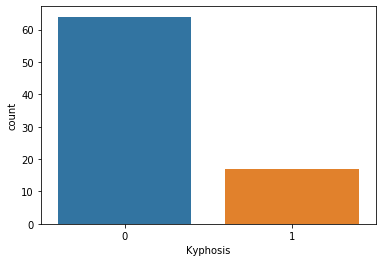

In [82]:
sns.countplot(x='Kyphosis', data=data)

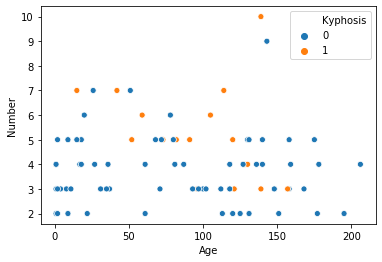

In [83]:
sns.scatterplot(y='Number',x='Age',data=data,hue='Kyphosis')

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sukhmeet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


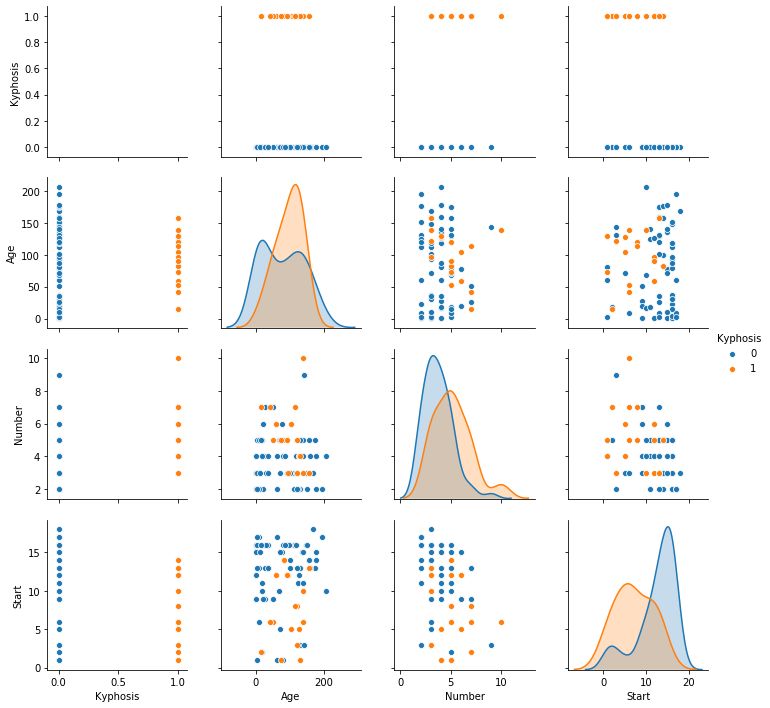

In [84]:
sns.pairplot(data=data,hue='Kyphosis')

In [85]:
x=data.drop('Kyphosis',axis=1)

In [86]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [87]:
y=data['Kyphosis']

In [88]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [89]:
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=5,test_size=0.2)

In [90]:
X_train.shape

(64, 3)

In [91]:
X_test.shape

(17, 3)

In [92]:
y_train.shape

(64,)

In [93]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [94]:
decision_tree.feature_importances_

array([0.33000111, 0.08432871, 0.58567018])

In [95]:
features_imp=pd.DataFrame(decision_tree.feature_importances_ , index=X_train.columns,columns=['importance'])

In [96]:
features_imp

,importance
Age,0.330001
Number,0.084329
Start,0.585670


In [97]:
from sklearn.metrics import classification_report, confusion_matrix


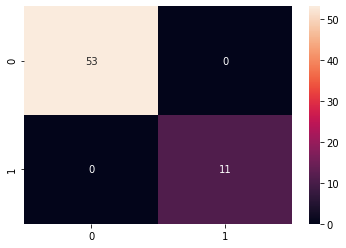

In [98]:
y_predict_train = decision_tree.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

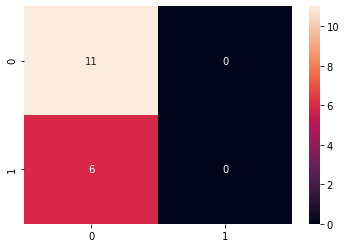

In [99]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [100]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       0.00      0.00      0.00         6

    accuracy                           0.65        17
   macro avg       0.32      0.50      0.39        17
weighted avg       0.42      0.65      0.51        17



C:\Users\Sukhmeet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

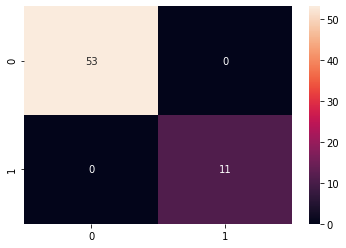

In [102]:
y_predict_train = RandomForest.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

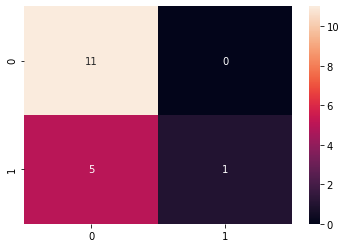

In [103]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [104]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.17      0.29         6

    accuracy                           0.71        17
   macro avg       0.84      0.58      0.55        17
weighted avg       0.80      0.71      0.63        17



In [105]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [106]:
RandomForest.fit(X_train_sc, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

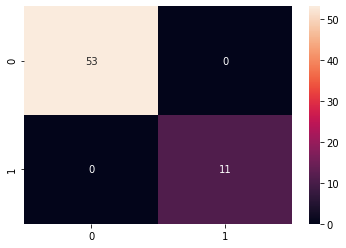

In [107]:
y_predict_train = RandomForest.predict(X_train_sc)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

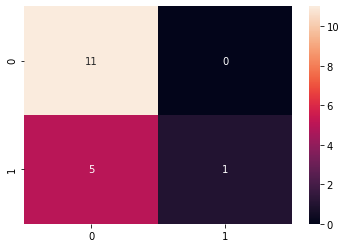

In [108]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test_sc)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [109]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.17      0.29         6

    accuracy                           0.71        17
   macro avg       0.84      0.58      0.55        17
weighted avg       0.80      0.71      0.63        17

